In [3]:
#!{sys.executable} -m pip install --upgrade deepracer-utils

In [4]:
from deepracer.tracks import TrackIO, Track, GeometryUtils, TrackPlotter
from deepracer.tracks.track_utils import track_breakdown, track_meta
import math
import numpy as np

In [5]:
tu = TrackIO()
track_name = "reinvent_base"
track: Track = tu.load_track(track_name)

Loaded 71 waypoints


<__array_function__ internals>:180: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.


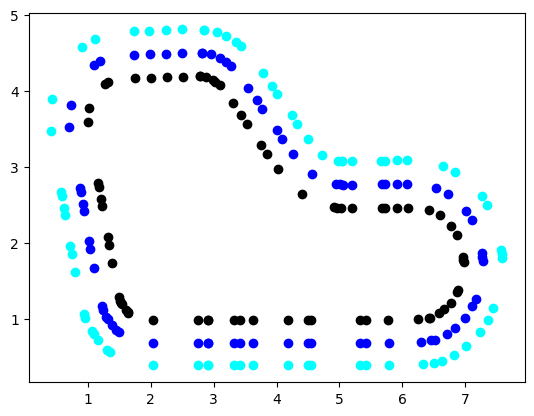

In [6]:
TrackPlotter.plot_track(track)

In [7]:
assert len(track.outer_border) == len(track.inner_border)
track.outer_border
track.inner_border

track_widths = []
for i, _ in enumerate(track.outer_border):
    track_widths.append(math.dist(track.outer_border[i], track.inner_border[i]))

track_widths[:5]


[0.6017725800257864,
 0.6017236843242612,
 0.6017117585434013,
 0.6016867135492645,
 0.6016199300307823]

In [8]:
max(track_widths), min(track_widths), sum(track_widths) / len(track_widths)

(0.6242015289254961, 0.5906041356688785, 0.6089869570222295)

In [96]:
from math import atan2, degrees, radians
 
# def get_angle_deg(closest_waypoint, the_second_closest_wp, furthest_waypoint):
#     """Get angle in degrees"""
#     print('Inputs',closest_waypoint, the_second_closest_wp, furthest_waypoint)
#     first_term = math.atan2(furthest_waypoint[1]-closest_waypoint[1], furthest_waypoint[0]-closest_waypoint[0])
#     print('first term',first_term)
#     second_term = math.atan2(the_second_closest_wp[1]-closest_waypoint[1], the_second_closest_wp[0]-closest_waypoint[0])
#     print('second term', second_term)
    
#     ang = math.degrees(first_term - second_term)
#     return ang + 360 if ang < 0 else ang
def get_angle_deg(closest_waypoint, the_second_closest_wp, furthest_waypoint):
    """Get angle in degrees"""
    
    print('\n----- Getting angle in degrees -----')
    print('Inputs',closest_waypoint, the_second_closest_wp, furthest_waypoint)
    
    dist_cl_to_second = math.dist(closest_waypoint, the_second_closest_wp)
    print('dist_cl_to_second term',dist_cl_to_second)

    dist_cl_to_last = math.dist(closest_waypoint, furthest_waypoint)
    print('dist_cl_to_last term',dist_cl_to_last)
    
    dist_second_to_last = math.dist(the_second_closest_wp, furthest_waypoint)
    print('dist_cl_to_last term',dist_second_to_last)
    
    hypotenuse_from_first_to_last = math.sqrt(furthest_waypoint[0]**2 + furthest_waypoint[1]**2)  
    print('hypotenuse_from_first_to_last',hypotenuse_from_first_to_last)
    assert(hypotenuse_from_first_to_last == dist_cl_to_last)
    
    # arc_tan_term_one = hypotenuse_from_first_to_last**2 + furthest_waypoint[0]**2 - furthest_waypoint[1]**2
    # arc_tan_term_two = 2 * hypotenuse_from_first_to_last * furthest_waypoint[1]
    # angle_from_first = math.degrees(math.acos(arc_tan_term_one/ arc_tan_term_two))
    # print('angle_from_first', angle_from_first)

    # bearing = math.degrees(math.atan2(dist_cl_to_second, dist_cl_to_last))
    # print('Bearing is', bearing)
    # print('furthest_waypoint', furthest_waypoint)
    # print('furthest_waypoint[0]/ furthest_waypoint[1]', furthest_waypoint[0], furthest_waypoint[1])
    # x_div_y = 0 if furthest_waypoint[0] == 0 else furthest_waypoint[1]/ furthest_waypoint[0]
    # x_div_y = dist_second_to_last / dist_cl_to_second
    # x_div_y = furthest_waypoint[1] / closest_waypoint[0]
    
    # print('x_div_y',x_div_y)
    angle = math.degrees(math.atan2(furthest_waypoint[0], furthest_waypoint[1]))
    return angle
 
tests = [
            {   
                'data':((0, 0), (0, 5), (-5, 5)),
                'expected_ang': -45
            },   
            {   
                'data':((0, 0), (0, 5), (-4, 0)),
                'expected_ang': -90
            },   
            {   
                'data':((0, 0), (0, 5), (-5, 0)),
                'expected_ang': -90
            }, 
         ] 

for test in tests:
    result=get_angle_deg(*test['data'])
    expected_angle = test['expected_ang']
    assert expected_angle == result, f'Result {result} did not match expected value {expected_angle}'
    print(f'For test {test}, expected value {expected_angle} and got {result}')
 
# pos_90_1=((0, 0), (-5, 5), (0, 5))
# ass_pos_90_1 = get_angle_deg(*pos_90_1)
# assert ass_pos_90_1 == 90 

# print('Should be 45:', get_angle_deg((0, 0),(5, 0), (-5, 5)))
# print('Should be 45:', get_angle_deg((0, 0), (5, 0), (5, 5)))
# print('Should be 90:', ass_pos_90_1)



----- Getting angle in degrees -----
Inputs (0, 0) (0, 5) (-5, 5)
dist_cl_to_second term 5.0
dist_cl_to_last term 7.0710678118654755
dist_cl_to_last term 5.0
hypotenuse_from_first_to_last 7.0710678118654755
For test {'data': ((0, 0), (0, 5), (-5, 5)), 'expected_ang': -45}, expected value -45 and got -45.0

----- Getting angle in degrees -----
Inputs (0, 0) (0, 5) (-4, 0)
dist_cl_to_second term 5.0
dist_cl_to_last term 4.0
dist_cl_to_last term 6.4031242374328485
hypotenuse_from_first_to_last 4.0
For test {'data': ((0, 0), (0, 5), (-4, 0)), 'expected_ang': -90}, expected value -90 and got -90.0

----- Getting angle in degrees -----
Inputs (0, 0) (0, 5) (-5, 0)
dist_cl_to_second term 5.0
dist_cl_to_last term 5.0
dist_cl_to_last term 7.0710678118654755
hypotenuse_from_first_to_last 5.0
For test {'data': ((0, 0), (0, 5), (-5, 0)), 'expected_ang': -90}, expected value -90 and got -90.0


In [21]:
angles = []
for i, _ in enumerate(track.center_line):
    is_last_index = i == len(track.center_line) - 1
    is_second_last_index = i == len(track.center_line) - 2
    last_index = i+1
    
    second_point = track.center_line[0]if is_last_index else track.center_line[last_index] 

    third_point = track.center_line[0] if is_second_last_index else \
        track.center_line[1] \
            if is_last_index \
                else track.center_line[i+2]
         
    angles.append(get_angle_deg(track.center_line[i], second_point, third_point))

print(f'The individual angles stats are, right_max: {max(angles)}, left_max: {min(angles)}, mean: {sum(angles) / len(angles)}')

The individual angles stats are, right_max: 360.0, left_max: 0.0, mean: 86.1412908622458


In [33]:
CORNER_THRESHOLD_ANGLE = 0.5

corners=[]
current_corner={ 'id': 0 }

for i, _ in enumerate(track.center_line):
    
    # is_last_index = i == len(track.center_line) -1
    
    second_point = track.center_line[0]if is_last_index else track.center_line[i+1] 
    
    angles.append(get_angle_deg(track.center_line[i], second_point))

print(f'The individual angles stats are, max: {max(angles)}, min: {min(angles)}, mean: {sum(angles) / len(angles)}')

The individual angles stats are, max: 3.039774025327458, min: -3.141235144419253, mean: -0.4881785381388011
